# Housing price prediction 

#### import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

#### import data

In [33]:
housing = pd.read_csv("../data/housing.csv")

#### data exploration

In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [36]:
housing.shape

(20640, 10)

In [37]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### data cleaning

In [38]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [39]:
housing = housing.dropna()

In [40]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### simple EDA

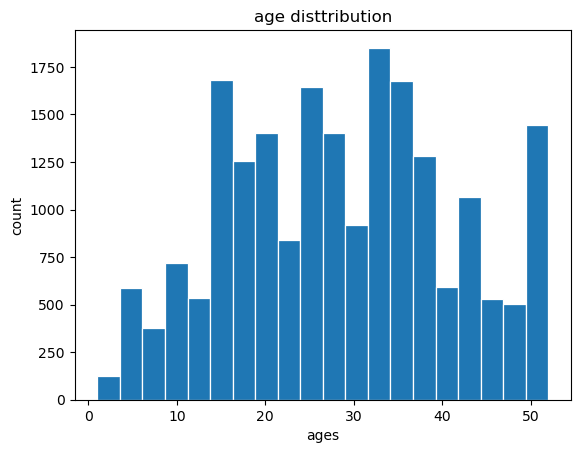

In [41]:
plt.hist(x=housing["housing_median_age"], bins=20, linewidth=0.9, edgecolor="white")

plt.title("age disttribution")
plt.xlabel("ages")
plt.ylabel("count")

plt.show()

In [42]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [43]:
housing2 = housing.drop("ocean_proximity", axis=1)

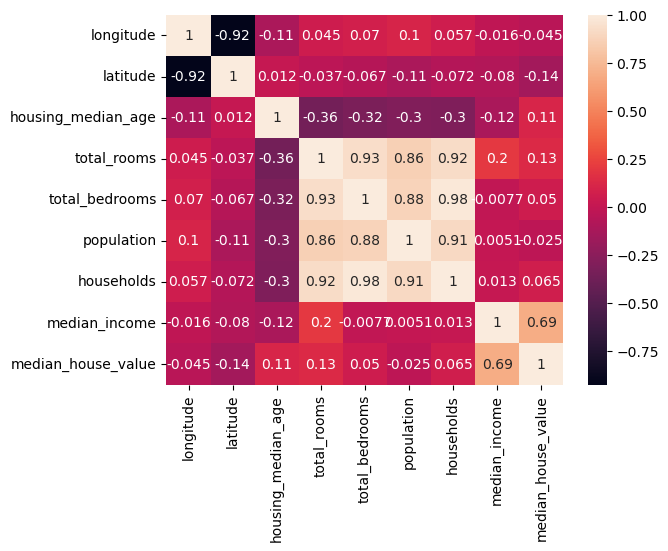

In [44]:
import seaborn as sns

correlation_matrix = housing.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [45]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### encoding categorical columns

In [46]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_matrix = encoder.fit_transform(np.array([housing["ocean_proximity"]]).T)

new_columns = encoder.get_feature_names()
encoded_df = pd.DataFrame(encoded_matrix.toarray(), columns=new_columns)
encoded_df

,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20428,0.0,1.0,0.0,0.0,0.0
20429,0.0,1.0,0.0,0.0,0.0
20430,0.0,1.0,0.0,0.0,0.0
20431,0.0,1.0,0.0,0.0,0.0


In [47]:
# merge
housing = housing.merge(encoded_df, left_index=True, right_index=True)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-118.83,34.23,6.0,8803.0,1114.0,3385.0,1010.0,8.7288,425800.0,<1H OCEAN,0.0,1.0,0.0,0.0,0.0
20429,-118.84,34.22,11.0,3170.0,420.0,1418.0,432.0,7.5118,361900.0,<1H OCEAN,0.0,1.0,0.0,0.0,0.0
20430,-118.84,34.21,16.0,4975.0,949.0,2537.0,971.0,5.2361,224700.0,<1H OCEAN,0.0,1.0,0.0,0.0,0.0
20431,-118.80,34.21,16.0,1466.0,196.0,661.0,209.0,6.2893,282700.0,<1H OCEAN,0.0,1.0,0.0,0.0,0.0


In [48]:
# drop unwanted features
unwanted_columns = ["ocean_proximity"]
housing = housing.drop(unwanted_columns, axis=1)

In [49]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-118.83,34.23,6.0,8803.0,1114.0,3385.0,1010.0,8.7288,425800.0,0.0,1.0,0.0,0.0,0.0
20429,-118.84,34.22,11.0,3170.0,420.0,1418.0,432.0,7.5118,361900.0,0.0,1.0,0.0,0.0,0.0
20430,-118.84,34.21,16.0,4975.0,949.0,2537.0,971.0,5.2361,224700.0,0.0,1.0,0.0,0.0,0.0
20431,-118.80,34.21,16.0,1466.0,196.0,661.0,209.0,6.2893,282700.0,0.0,1.0,0.0,0.0,0.0


#### splitting the data

In [50]:
X = np.array(housing.drop("median_house_value", axis=1))
y = np.array(housing["median_house_value"])

X.shape, y.shape

((20228, 13), (20228,))

In [51]:
X[0, :]

array([-122.23  ,   37.88  ,   41.    ,  880.    ,  129.    ,  322.    ,
        126.    ,    8.3252,    0.    ,    0.    ,    0.    ,    1.    ,
          0.    ])

In [52]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scalable_features = X[:, :-5]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(scalable_features, y)
X = np.concatenate((scaled_features, X[:, -5:]), axis=1)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [54]:
X_train.shape

(14159, 13)

#### Model selection

try Linear regression model

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
model.coef_

array([-79052.22147859, -81424.60517054,  14031.0815496 ,  -9699.6627252 ,
        42153.48439018, -50132.3614298 ,  21916.08802401,  74101.3950992 ,
        18472.77748164,  -4664.71668259, -23393.82952545,   2705.31808014,
         6880.45064627])

In [57]:
model.intercept_

199858.30979324676

In [58]:
X_test[0, :], y_test[0]

(array([ 1.52048712, -0.78746464, -1.3234522 ,  0.3378424 ,  0.57627717,
        -0.09594137,  0.22282215, -1.12286192,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]),
 66000.0)

In [59]:
X_sample = X_test[0, :]
y_sample = y_test[0]

In [60]:
prediction = model.predict([X_sample])
prediction, y_sample

(array([68047.89551489]), 66000.0)

Test the model performance

In [61]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))

print(RMSE)

68600.43017213233


#### try multiple models and compare them

In [324]:
# install xgboost model
!pip install xgboost

In [325]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDClassifier, LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


def compare_models(models_dict, X_train, X_test, y_train, y_test):
    models_df = pd.DataFrame(columns=["model", "score"])
    
    for model_name in models_dict.keys():
        
        model = models_dict[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
        
        new_row = pd.DataFrame({"model": [model_name], "score": [RMSE]})
        models_df = pd.concat([models_df, new_row], ignore_index=True)
    
    return models_df



models = {"ridge": Ridge(), 
          "lasso": Lasso(), 
          "elastic": ElasticNet(), 
          "sgd": SGDClassifier(),
          "lr": LinearRegression(),
          "xgb": XGBRegressor()
}
evaluation = compare_models(models, X_train, X_test, y_train, y_test)
evaluation        

,model,score
0,ridge,64894.521584
1,lasso,64893.330098
2,elastic,75697.662761
3,sgd,106482.071193
4,lr,64892.742530
5,xgb,47065.767702


**conclusion:** the xgboost has the best score, we will use it

#### Fine tuning the XGB model

find the best params

In [173]:
from sklearn.model_selection import GridSearchCV


possible_params = {
    "n_estimators": [350, 400, 450],
    "max_depth": [8, 10, 12],
    "learning_rate": [0.09, 0.1, 0.11]
}

grid = GridSearchCV(estimator=XGBRegressor(), 
                    param_grid=possible_params, 
                    scoring="neg_root_mean_squared_error"
                   )
grid.fit(X_train, y_train)


print(grid.best_params_)

KeyboardInterrupt: 

retrain the model with the best params

In [314]:
# best_params = grid.best_params_
params = {
    "n_estimators": 500,
    "max_depth": 7,
    "learning_rate": 0.09
}
xgb = XGBRegressor(**params)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))

print(f"best score: {RMSE}")

best score: 41921.32301042225


Let's do some preprocessing to improve the performance

In [19]:
# removing outliers
from sklearn.ensemble import IsolationForest

# Create IsolationForest instance
clf = IsolationForest(contamination=0.1)

# Fit the model and predict outliers
clf.fit(housing)
outliers = clf.predict(housing)
inliers_indexes = np.where(outliers == 1)

housing = housing.iloc[inliers_indexes]

# Thanks!